In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Optional: prevent TensorFlow from using GPU (for debugging or testing)
tf.config.set_visible_devices([], 'GPU')

# Check how many GPUs are available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
import pandas as pd
import zipfile
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
pwd

'/content'

In [43]:
import zipfile

zip_file = '/content/drive/MyDrive/content/face_mask_dataset.zip'  # הנתיב לקובץ הדחוס בדרייב

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall('/content/dataset')

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0,1] — helps speed up training and stabilize gradients
    shear_range=0.2,        # Apply a slight diagonal transformation (shear) — simulates natural changes in camera angle
    zoom_range=0.2,         # Apply random zoom-in effect — helps the model recognize objects at different scales
    horizontal_flip=True    # Flip images horizontally — helps the model handle symmetry (e.g., cat facing left or right)
)

# Testing data generator — only normalization, no augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
training_set = train_datagen.flow_from_directory(
    '/content/dataset/data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/dataset/data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 7553 images belonging to 2 classes.
Found 7553 images belonging to 2 classes.


In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential()

# שכבת קונבולוציה ראשונה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# שכבת קונבולוציה שנייה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten
cnn.add(Flatten())

# Fully Connected
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(x=training_set, validation_data=test_set, epochs=25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 69/237 ━━━━━━━━━━━━━━━━━━━━ 1:07 399ms/step - accuracy: 0.6657 - loss: 0.6319

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 ━━━━━━━━━━━━━━━━━━━━ 124s 505ms/step - accuracy: 0.7741 - loss: 0.4721 - val_accuracy: 0.9033 - val_loss: 0.2374
Epoch 2/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 117s 494ms/step - accuracy: 0.8981 - loss: 0.2523 - val_accuracy: 0.9146 - val_loss: 0.2126
Epoch 3/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 142s 492ms/step - accuracy: 0.9175 - loss: 0.2029 - val_accuracy: 0.9309 - val_loss: 0.1731
Epoch 4/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 138s 581ms/step - accuracy: 0.9265 - loss: 0.1781 - val_accuracy: 0.9398 - val_loss: 0.1502
Epoch 5/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 137s 580ms/step - accuracy: 0.9399 - loss: 0.1550 - val_accuracy: 0.9507 - val_loss: 0.1317
Epoch 6/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 120s 487ms/step - accuracy: 0.9316 - loss: 0.1741 - val_accuracy: 0.9493 - val_loss: 0.1224
Epoch 7/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 117s 491ms/step - accuracy: 0.9431 - loss: 0.1418 - val_accuracy: 0.9543 - val_loss: 0.1198
Epoch 8/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 116s 489ms/step - accuracy: 0.9520 - loss: 0.12

In [64]:
import numpy as np
from keras.preprocessing import image

# טוענים את התמונה
test_image = image.load_img('/content/dataset/data/with_mask/with_mask_148.jpg', target_size=(64, 64))

# Convert image to array
test_image = image.img_to_array(test_image)

# Normalize pixel values (rescale to [0,1])
test_image = test_image / 255.0

# Expand dimensions to match the CNN model input shape
test_image = np.expand_dims(test_image, axis=0)

# Predict using the trained CNN model
result = cnn.predict(test_image)
print(result)

# Interpret the result
if result[0][0] > 0.5:
    prediction = 'without_mask'
else:
    prediction = 'with_mask'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.17514913]]
with_mask


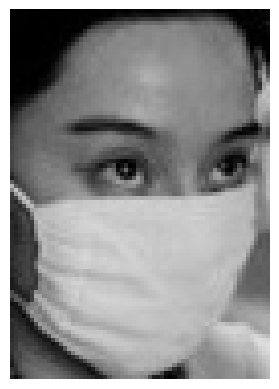

In [68]:
import matplotlib.pyplot as plt
path = '/content/dataset/data/with_mask/with_mask_148.jpg'
img = image.load_img(path)
plt.imshow(img)
plt.axis('off')
plt.show()